# Проект 4. Авиарейсы без потерь
## Задача проекта:
Выяснить, от каких самых малоприбыльных рейсов из Анапы компания может отказаться в зимнее время.

### import

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Добавим метод чтобы красиво отобржать текст
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [16]:
def first_look(df: pd.DataFrame, column: object):
    '''
    Функция для осмотра переменных
    '''
    
    printmd('### ' + str(column))
    if df.loc[:, col].dtypes == np.dtype('O'): # Проверка на строковый тип данных
        fig, ax = plt.subplots(figsize=(6, 5))
        sns.countplot(df.loc[:, column], ax=ax)
        plt.show()
        # Print misses percent
        misses = (1 - (df[column].count() / df.shape[0]))
        print('Процент пропусков: ', round(misses*100, 2), "%")
    else:
        # Prepare plot data frame
        plot_df = pd.DataFrame({'Распределение': df[column]})
       
        # Draw plot
        fig, ax = plt.subplots(figsize=(7 * plot_df.shape[1], 4))
        plot_df.hist(ax=ax)
        plt.show()
        # Print misses percent
        misses = (1 - (df[column].count() / df.shape[0]))
        print('Процент пропусков: ', round(misses*100, 2), "%")

In [124]:
def get_boxplot(df, col):
    fig, ax = plt.subplots(figsize = (7, 5))
    sns.boxplot(y= col, data = df, x = 'weekday')# используем доп признак - день недели
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()

### data

In [11]:
df = pd.read_csv('data/project_4.csv')
df.head()

,flight_id,actual_departure,actual_arrival,actual_flight_time_minutes,departure_city,arrival_city,model,availiable_seats,economy_seats,business_seats,passengers,economy_passengers,business_passengers,flight_occupancy,total_amount
0,136119,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,101.0,Anapa,Moscow,Boeing 737-300,130,118,12,113.0,102.0,11.0,0.869231,1653000.0
1,136120,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,99.0,Anapa,Moscow,Boeing 737-300,130,118,12,109.0,98.0,11.0,0.838462,1605400.0
2,136122,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,100.0,Anapa,Moscow,Boeing 737-300,130,118,12,97.0,87.0,10.0,0.746154,1431000.0
3,136130,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,99.0,Anapa,Moscow,Boeing 737-300,130,118,12,107.0,97.0,10.0,0.823077,1556600.0
4,136131,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,99.0,Anapa,Moscow,Boeing 737-300,130,118,12,124.0,112.0,12.0,0.953846,1812800.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   flight_id                   127 non-null    int64  
 1   actual_departure            127 non-null    object 
 2   actual_arrival              127 non-null    object 
 3   actual_flight_time_minutes  127 non-null    float64
 4   departure_city              127 non-null    object 
 5   arrival_city                127 non-null    object 
 6   model                       127 non-null    object 
 7   availiable_seats            127 non-null    int64  
 8   economy_seats               127 non-null    int64  
 9   business_seats              127 non-null    int64  
 10  passengers                  118 non-null    float64
 11  economy_passengers          118 non-null    float64
 12  business_passengers         118 non-null    float64
 13  flight_occupancy            118 non

### first look

### actual_flight_time_minutes

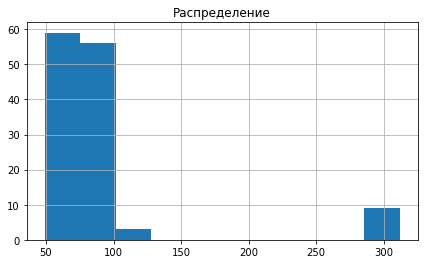

Процент пропусков:  0.0 %


### passengers

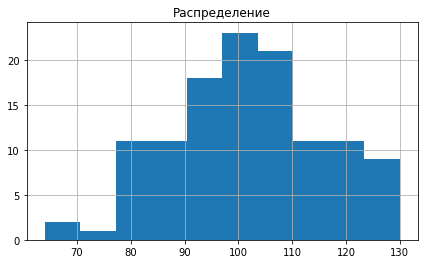

Процент пропусков:  7.09 %


### economy_passengers

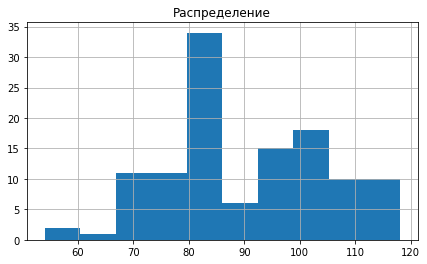

Процент пропусков:  7.09 %


### business_passengers

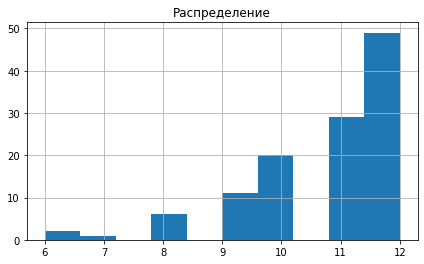

Процент пропусков:  7.09 %


### flight_occupancy

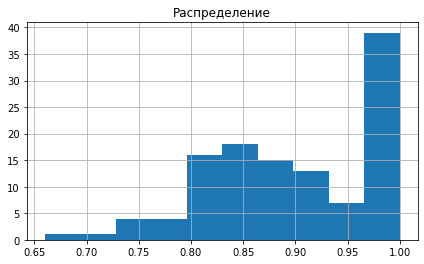

Процент пропусков:  7.09 %


### total_amount

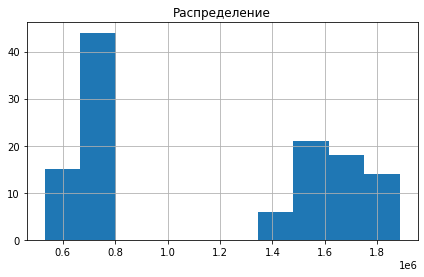

Процент пропусков:  7.09 %


In [27]:
columns = ['actual_flight_time_minutes', 'passengers', 'economy_passengers',
           'business_passengers', 'flight_occupancy', 'total_amount']
for col in columns:
    first_look(df, col)

In [29]:
df[df.passengers.isnull()]

,flight_id,actual_departure,actual_arrival,actual_flight_time_minutes,departure_city,arrival_city,model,availiable_seats,economy_seats,business_seats,passengers,economy_passengers,business_passengers,flight_occupancy,total_amount
59,136511,2017-02-21T06:15:00Z,2017-02-21T11:25:00Z,310.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
60,136513,2017-02-28T06:13:00Z,2017-02-28T11:23:00Z,310.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
61,136514,2017-02-07T06:14:00Z,2017-02-07T11:13:00Z,299.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
62,136523,2017-01-10T06:14:00Z,2017-01-10T11:26:00Z,312.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
63,136540,2017-01-17T06:14:00Z,2017-01-17T11:21:00Z,307.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
64,136544,2017-01-31T06:10:00Z,2017-01-31T11:14:00Z,304.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
65,136546,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,302.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
66,136560,2017-01-24T06:13:00Z,2017-01-24T11:18:00Z,305.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN
67,136567,2017-02-14T06:12:00Z,2017-02-14T11:23:00Z,311.0,Anapa,Novokuznetsk,Boeing 737-300,130,118,12,NaN,NaN,NaN,NaN,NaN


В датасете имеются пропуски в рейсах из Анапы в Новокузнецк, можем предположить что заполняемость этих рейсах была нулевая, или в данных ошибка. Удалим эти строки

In [31]:
df.dropna(inplace=True)

### feature engineering

Приведем actual_departure и actual_arrival к типу datetime и преобразуем данные по дням недели

In [40]:
df.actual_departure = pd.to_datetime(df.actual_departure)
df.actual_arrival = pd.to_datetime(df.actual_arrival)
df['weekday'] = df.actual_departure.dt.weekday

Добавим загруженность рейса по классу билета

In [42]:
df['economy_occupancy'] = df['economy_passengers']/df['economy_seats']
df['business_occupancy'] = df['business_passengers']/df['business_seats']

Добавим расход топлива на рейс и затраты на топливо

По данным источника https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm?id=7329, зимой в Анапе средняя стоимость топлтива составляла 40494 рубля за тонну    
По данным источника https://vpolete.online/pereletyi/rashod-topliva-raznyih-samoletov.html у моделей самолёта Boeing 737-300: затрата горючего – 2,4 т/ч или 0,04 т/м, Sukhoi Superjet 100: затрата горючего – 1,7 т/ч или 0,028 т/м

In [45]:
def fuel_consumption(row):
    if row.model == 'Sukhoi Superjet-100':
        return 0.028
    elif row.model == 'Boeing 737-300':
        return 0.04
df['fuel_consumption'] = df.apply(fuel_consumption, axis=1)
df['fuel_cost'] = df.actual_flight_time_minutes * df.fuel_consumption * 40494

Добавим выручку с продаж билетов за вычетом стоимости топлива

In [46]:
df['profit'] = df['total_amount'] - df['fuel_cost']

## Промежуточный вывод
Основными статья расходов, при формировании себестоимости рейса являются:
- содержание флота и тех обслуживание
- зарплата сотрудникам
- топливо
- другие расходы
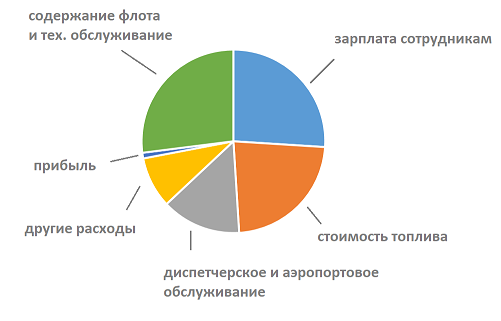    
Из базы данных мы не получили эти данные, так что будем ориентироваться на данные по расходу топливу, загруженности и даты рейса.

### data analysis

рассмотрим переменную profit

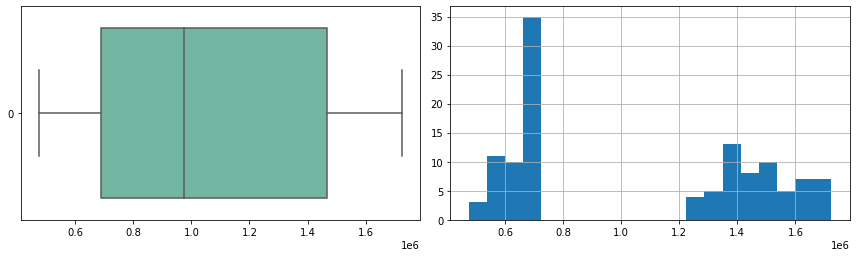

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 4))

sns.boxplot(data=df['profit'], orient="h",
                 palette="Set2", whis=1.5, ax=axes[0]);
df.profit.hist(bins=20, ax=axes[1])
fig.tight_layout(rect=[-1, 0.03, 1, 0.95])
plt.show()

Согласно гистограмме, мы имеем два пика распределения. Будем рассматривать отдельно рейсы в Москву и Белгород.

In [75]:
df_moscow = df[df.arrival_city == 'Moscow']
df_belgorod = df[df.arrival_city == 'Belgorod']

Рассмотрим зависимость заполняемости рейсов к прибыли

In [86]:
df_numeric = ['flight_occupancy', 'economy_occupancy', 'business_occupancy', 'profit']

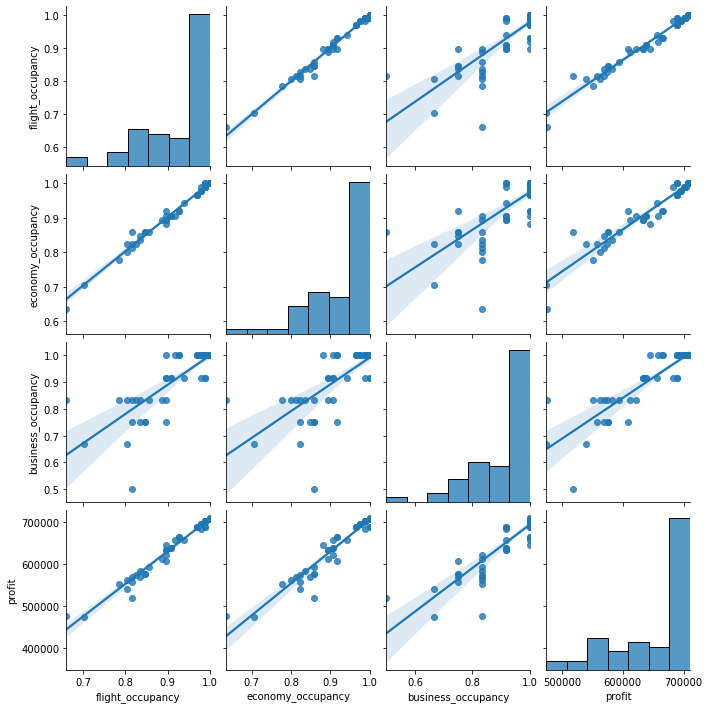

In [87]:
# Рассмотрим рейсы в белгород
sns.pairplot(df_belgorod[df_numeric], kind='reg')

In [84]:
df_belgorod[df_numeric].corr()

,actual_flight_time_minutes,flight_occupancy,economy_occupancy,business_occupancy,profit,availiable_seats
actual_flight_time_minutes,1.000000,0.193110,0.200529,0.111055,0.168399,NaN
flight_occupancy,0.193110,1.000000,0.993651,0.808998,0.988070,NaN
economy_occupancy,0.200529,0.993651,1.000000,0.737729,0.964520,NaN
business_occupancy,0.111055,0.808998,0.737729,1.000000,0.889612,NaN
profit,0.168399,0.988070,0.964520,0.889612,1.000000,NaN
availiable_seats,NaN,NaN,NaN,NaN,NaN,NaN


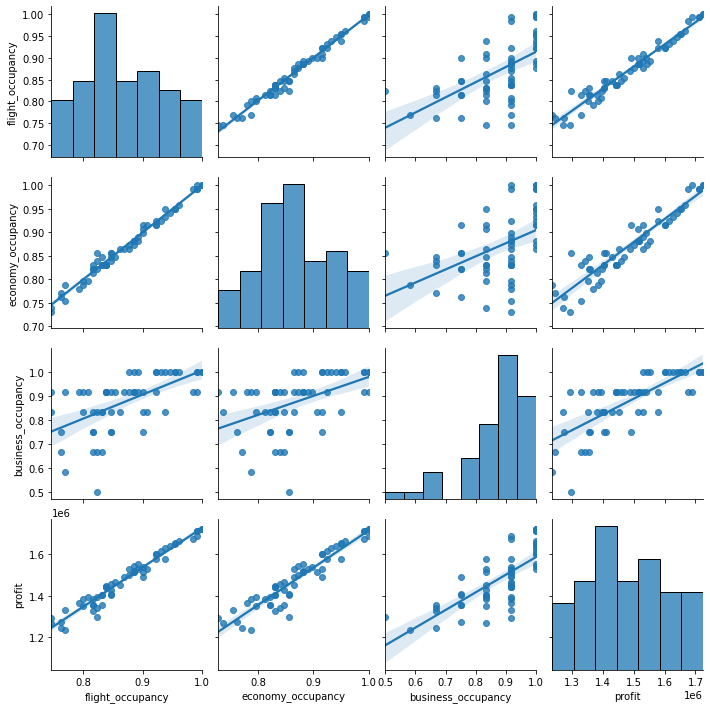

In [88]:
sns.pairplot(df_moscow[df_numeric], kind='reg')

In [89]:
df_moscow[df_numeric].corr()

,flight_occupancy,economy_occupancy,business_occupancy,profit
flight_occupancy,1.000000,0.990380,0.587221,0.977581
economy_occupancy,0.990380,1.000000,0.469571,0.939101
business_occupancy,0.587221,0.469571,1.000000,0.744142
profit,0.977581,0.939101,0.744142,1.000000


Как и следовало ожидать мы имеем прямую зависимость между прибылью и заполняемостью рейсов. Прибыль рейсов в Москву имеют большую прибыль и имеют меньшую зависисмость от заполняемости бизнес-класса. Рейсы в Белгород более стабильны и имеют большую заполняемость.

Рассмотрим зависимость загруженности и прибыли по отношению ко дню недели для рейсов в Москву:

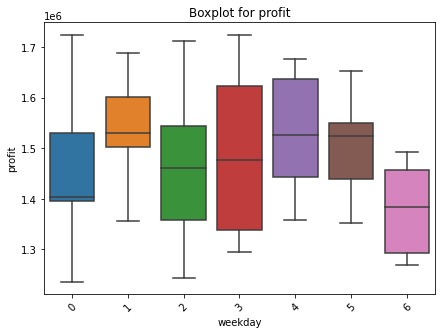

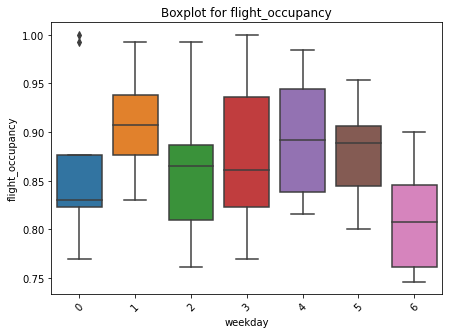

In [125]:
columns = ['profit', 'flight_occupancy']
for col in columns:
    get_boxplot(df_moscow, col)

Исходя из боксплотов, мы видим что рейсы в воскресенье в Москву менее загруженны, и следовательно менее прибыльны

Рассмотрим зависимость загруженности и прибыли по отношению ко дню недели для рейсов в Белгород:

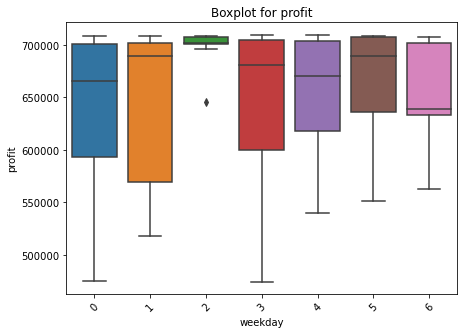

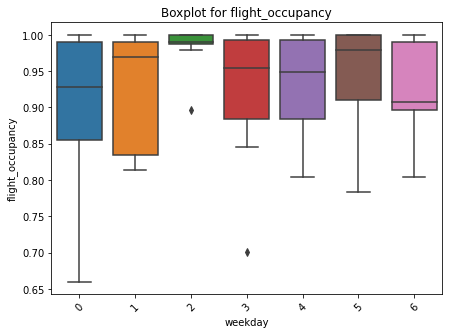

In [136]:
for col in columns:
    get_boxplot(df_belgorod, col)

Судя по графикам, большенство рейсов в Белгород имеют стабильно высокую загруженность и прибыль, но имеется несколько выбросов.

Так как данных для расчета рентабельности рейса недостаточно, будем считать что рейс является прибыльнам при загрузке более 75%, согласно данным из открытых источников:    
https://www.kommersant.ru/doc/3246832

Оставим в датайфрейме только те рейсы, у которых загруженность менее 75%

In [138]:
result = df[df.flight_occupancy < 0.75]
result

,flight_id,actual_departure,actual_arrival,actual_flight_time_minutes,departure_city,arrival_city,model,availiable_seats,economy_seats,business_seats,passengers,economy_passengers,business_passengers,flight_occupancy,total_amount,weekday,economy_occupancy,business_occupancy,fuel_consumption,fuel_cost,profit
2,136122,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,100.0,Anapa,Moscow,Boeing 737-300,130,118,12,97.0,87.0,10.0,0.746154,1431000.0,6,0.737288,0.833333,0.040,161976.000,1269024.000
38,136360,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,100.0,Anapa,Moscow,Boeing 737-300,130,118,12,97.0,86.0,11.0,0.746154,1455400.0,6,0.728814,0.916667,0.040,161976.000,1293424.000
77,136642,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,49.0,Anapa,Belgorod,Sukhoi Superjet-100,97,85,12,64.0,54.0,10.0,0.659794,531000.0,0,0.635294,0.833333,0.028,55557.768,475442.232
102,136807,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,50.0,Anapa,Belgorod,Sukhoi Superjet-100,97,85,12,68.0,60.0,8.0,0.701031,531000.0,3,0.705882,0.666667,0.028,56691.600,474308.400


# Вывод
Малоприбыльными в зимнее время являются рейсы:
1. 136642  2017-01-30  Анапа - Белгород
2. 136807  2017-02-23  Анапа - Белгород   
1. 136122  2017-01-08  Анапа - Москва
2. 136360  2017-02-05  Анапа - Москва  

Для более точной оценки не хватает данных о затратах на содержание флота, зарплате сотрудников, диспетчерское и аэропортовое облуживание и других расходов.    

Я бы рекомендовал сократить количество рейсов из Анапы в Москву по воскресеньям, чтобы увеличить заполняемость.